# Advanced Analytics and Applications
## Analytics Anacondas 

### Data Collection and Preparation 

##### Part 01

In [1]:
# import relevant libaries 
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import glob 
from vincenty import vincenty
import datetime

import geopandas
import json
# conda install h3-py -c conda-forge
from h3 import h3
from shapely.geometry import shape
from descartes import PolygonPatch

import folium

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# take a look into the data and its structure 
df = pd.read_csv("Data/2019/01/positions_nextbike_bonn_2019_01_28.csv", sep=',')
df.head()

,p_rack_locks,p_bike_racks,b_state,p_spot,b_active,p_booked_bikes,p_place_type,datetime,b_number,trip,...,b_lock_types,city,p_number,b_pedelec_battery,p_lng,b_boardcomputer,p_maintenance,p_terminal_type,p_bike,p_bike_types
0,False,0,ok,False,True,0,12,2019-01-28 00:00:00,44728,first,...,frame_lock,bonn,0,0,7.119859,7551003176,False,NaN,True,"{""71"": 1}"
1,False,0,ok,False,True,0,12,2019-01-28 23:59:00,44728,last,...,frame_lock,bonn,0,0,7.119811,7551003176,False,NaN,True,"{""71"": 1}"
2,False,0,ok,False,True,0,12,2019-01-28 00:00:00,44658,first,...,frame_lock,bonn,0,0,7.056917,7551020727,False,NaN,True,"{""71"": 1}"
3,False,0,ok,False,True,0,12,2019-01-28 23:59:00,44658,last,...,frame_lock,bonn,0,0,7.056791,7551020727,False,NaN,True,"{""71"": 1}"
4,False,0,ok,False,True,0,12,2019-01-28 00:00:00,44929,first,...,frame_lock,bonn,0,0,7.095922,7551006770,False,NaN,True,"{""71"": 1}"


In [5]:
# explore columns and its meanings 
df.columns

Index(['p_rack_locks', 'p_bike_racks', 'b_state', 'p_spot', 'b_active',
       'p_booked_bikes', 'p_place_type', 'datetime', 'b_number', 'trip',
       'p_uid', 'p_bikes', 'p_lat', 'b_electric_lock', 'b_bike_type', 'p_name',
       'p_free_racks', 'p_address', 'b_lock_types', 'city', 'p_number',
       'b_pedelec_battery', 'p_lng', 'b_boardcomputer', 'p_maintenance',
       'p_terminal_type', 'p_bike', 'p_bike_types'],
      dtype='object')

In [4]:
# TODO table of columns with its meanings 

In [8]:
# show dataframe with columns that might be useful for further analyses and the computation of trip data
df = df[["b_active","p_place_type","datetime","b_number","trip","p_uid","p_bikes","p_lat","p_lng","p_name","city","p_number","p_bike","p_bike_types"]]


In [6]:
df.head(20)

,b_active,p_place_type,datetime,b_number,trip,p_uid,p_bikes,p_lat,p_lng,p_name,city,p_number,p_bike,p_bike_types
0,True,12,2019-01-28 00:00:00,44728,first,12238528,1,50.751664,7.119859,BIKE 44728,bonn,0,True,"{""71"": 1}"
1,True,12,2019-01-28 23:59:00,44728,last,12292496,1,50.751783,7.119811,BIKE 44728,bonn,0,True,"{""71"": 1}"
2,True,12,2019-01-28 00:00:00,44658,first,12266270,1,50.748038,7.056917,BIKE 44658,bonn,0,True,"{""71"": 1}"
3,True,12,2019-01-28 23:59:00,44658,last,12266270,1,50.748084,7.056791,BIKE 44658,bonn,0,True,"{""71"": 1}"
4,True,12,2019-01-28 00:00:00,44929,first,12270065,1,50.719922,7.095922,BIKE 44929,bonn,0,True,"{""71"": 1}"
5,True,12,2019-01-28 23:59:00,44929,last,12270065,1,50.719921,7.095809,BIKE 44929,bonn,0,True,"{""71"": 1}"
6,True,12,2019-01-28 00:00:00,44607,first,12271247,1,50.749891,7.043951,BIKE 44607,bonn,0,True,"{""71"": 1}"
7,True,12,2019-01-28 23:59:00,44607,last,12307708,1,50.750058,7.043390,BIKE 44607,bonn,0,True,"{""71"": 1}"
8,True,12,2019-01-28 00:00:00,44650,first,12277788,1,50.725752,7.034684,BIKE 44650,bonn,0,True,"{""71"": 1}"
9,True,12,2019-01-28 23:59:00,44650,last,12277788,1,50.725879,7.034632,BIKE 44650,bonn,0,True,"{""71"": 1}"


In [7]:
df["trip"].unique()

array(['first', 'last', 'start', 'end'], dtype=object)

There are four different values in the trip column [first, last, start, end]. 
At least two values are required to define whether the data set belongs to the starting point or the end of the trip. This means that one trip is represented in two rows in the dataframe. One of the rows contains the values at the starting point (i.e. datetime, start position) and the other row contains the values at the ending point of the trip. 


###### Why are there four values in the trip column? 

Let's have a deeper look in the dataframe and the trip column.

In [8]:
df[(df["trip"] == "first") | (df["trip"] =="last")].head(20)

,b_active,p_place_type,datetime,b_number,trip,p_uid,p_bikes,p_lat,p_lng,p_name,city,p_number,p_bike,p_bike_types
0,True,12,2019-01-28 00:00:00,44728,first,12238528,1,50.751664,7.119859,BIKE 44728,bonn,0,True,"{""71"": 1}"
1,True,12,2019-01-28 23:59:00,44728,last,12292496,1,50.751783,7.119811,BIKE 44728,bonn,0,True,"{""71"": 1}"
2,True,12,2019-01-28 00:00:00,44658,first,12266270,1,50.748038,7.056917,BIKE 44658,bonn,0,True,"{""71"": 1}"
3,True,12,2019-01-28 23:59:00,44658,last,12266270,1,50.748084,7.056791,BIKE 44658,bonn,0,True,"{""71"": 1}"
4,True,12,2019-01-28 00:00:00,44929,first,12270065,1,50.719922,7.095922,BIKE 44929,bonn,0,True,"{""71"": 1}"
5,True,12,2019-01-28 23:59:00,44929,last,12270065,1,50.719921,7.095809,BIKE 44929,bonn,0,True,"{""71"": 1}"
6,True,12,2019-01-28 00:00:00,44607,first,12271247,1,50.749891,7.043951,BIKE 44607,bonn,0,True,"{""71"": 1}"
7,True,12,2019-01-28 23:59:00,44607,last,12307708,1,50.750058,7.043390,BIKE 44607,bonn,0,True,"{""71"": 1}"
8,True,12,2019-01-28 00:00:00,44650,first,12277788,1,50.725752,7.034684,BIKE 44650,bonn,0,True,"{""71"": 1}"
9,True,12,2019-01-28 23:59:00,44650,last,12277788,1,50.725879,7.034632,BIKE 44650,bonn,0,True,"{""71"": 1}"


In this filtered dataframe above it gets clear that the examples with the values **first** and **last** in the trip column don't make much sense. Most of the trips in this dataframe have an unlikely long trip duration. The start time of a trip is almost always at 0 AM and the end time of a trip is at 23:59 PM. 
Furthermore the start and the end positions of one trip are nearly the same. 

It could be measurement errors or other data recording procedures. <br> 
These datasets can be disregarded for the next steps, because they aren't suitable for further analyses and they don't represent a real trip.  

Another column which becomes clear is the **p_number**. If the p_number is eqaul to zero then the p_name has a value that contains 'BIKE'. IF the p_number isn't equal to zero then there exists a name for the positon. This indicates that the trip starts or ends at an official bike station. 

In [9]:
# datasets where the duration of a trip is much more meaningful  
df[(df["trip"] == "start") | (df["trip"] =="end")].head(20)

,b_active,p_place_type,datetime,b_number,trip,p_uid,p_bikes,p_lat,p_lng,p_name,city,p_number,p_bike,p_bike_types
11,True,12,2019-01-28 23:23:00,44647,start,12262294,1,50.739120,7.073766,BIKE 44647,bonn,0,True,"{""71"": 1}"
12,True,12,2019-01-28 23:29:00,44647,end,12308310,1,50.742764,7.073442,BIKE 44647,bonn,0,True,"{""71"": 1}"
27,True,12,2019-01-28 09:37:00,44795,start,12233021,1,50.691034,7.130670,BIKE 44795,bonn,0,True,"{""71"": 1}"
28,True,12,2019-01-28 09:47:00,44795,end,12292170,1,50.686653,7.159832,BIKE 44795,bonn,0,True,"{""71"": 1}"
35,True,12,2019-01-28 08:47:00,44719,start,12276651,1,50.743868,7.079610,BIKE 44719,bonn,0,True,"{""71"": 1}"
36,True,12,2019-01-28 09:00:00,44719,end,12291350,1,50.724698,7.087712,BIKE 44719,bonn,0,True,"{""71"": 1}"
37,True,12,2019-01-28 09:07:00,44719,start,12291350,1,50.724698,7.087712,BIKE 44719,bonn,0,True,"{""71"": 1}"
38,True,12,2019-01-28 09:39:00,44719,end,12292023,1,50.724831,7.087654,BIKE 44719,bonn,0,True,"{""71"": 1}"
39,True,12,2019-01-28 16:43:00,44719,start,12294951,1,50.724819,7.087713,BIKE 44719,bonn,0,True,"{""71"": 1}"
40,True,12,2019-01-28 16:52:00,44719,end,12300675,1,50.718751,7.107172,BIKE 44719,bonn,0,True,"{""71"": 1}"


A trip consists of two successive datasets. The first contains the values at the start and the second dataset contains the values at the ending point of the trip. In the next steps we can join these datasets to one dataset, so that a trip is represented in just one dataset with features about the start and end time and the start and end location as well. 

In [3]:
# read in the availabe data for every month and day 
df = pd.DataFrame()

#read in files for each month 
# for i in range(1,13): 
#     if i <10: 
#         #read in files for each day
#         for i in glob.glob("Data/2019/0" + str(i) +"/*.csv"):     
#             df_1 = pd.read_csv(i, sep=',')
#             df = pd.concat([df, df_1],axis=0)    # concatenate to one dateframe     
#     else: 
#         #read in files for each day
#         for i in glob.glob("Data/2019/" + str(i) +"/*.csv"):     
#             df_1 = pd.read_csv(i, sep=',')
#             df = pd.concat([df, df_1],axis=0)    # concatenate to one dateframe     

# df.reset_index(drop=True,inplace=True)
# df.to_csv("Data/compressedRawData.csv")

df = pd.read_csv("Data/compressedRawData.csv", index_col=0)


In [4]:
# there are more "start" than "end" datasets 
df["trip"].value_counts()

start    1073109
end      1049372
last      237025
first     236756
Name: trip, dtype: int64

In [5]:
# check, if the next dataset belongs to the current dataset 
# this means that they build a pair for one trip
# if they have the same trip type, we want to delete them 
deletionFilter = df["trip"] != df["trip"].shift(-1)

In [6]:
# apply the filter 
df = df[deletionFilter]
df.groupby("trip").count() 
# the number of datasets for trip types: ("start"/"end") is equal now 
# after merging these to trip data, we have to get 1049372 trips in our final dataframe

,p_rack_locks,p_bike_racks,b_state,p_spot,b_active,p_booked_bikes,p_place_type,datetime,b_number,p_uid,...,b_pedelec_battery,p_lng,b_boardcomputer,p_maintenance,p_terminal_type,p_bike,p_bike_types,b_battery_pack,p_special_racks,p_free_special_racks
trip,,,,,,,,,,,,,,,,,,,,,
end,1049372,1049372,1049372,1049372,1049372,1049372,1049372,1049372,1049372,1049372,...,118382,1049372,1049372,1049372,46822,1049372,1049372,347,839769,839769
first,236686,236686,236686,236686,236686,236686,236686,236686,236686,236686,...,36318,236686,236686,236686,11018,236686,236686,62,176715,176715
last,237025,237025,237025,237025,237025,237025,237025,237025,237025,237025,...,35976,237025,237025,237025,7312,237025,237025,59,177473,177473
start,1049372,1049372,1049372,1049372,1049372,1049372,1049372,1049372,1049372,1049372,...,118414,1049372,1049372,1049372,58292,1049372,1049372,364,840065,840065


In [7]:
# function that gets the raw data and returns the final trip data 
def get_df_final_trips(p_df): 
    
    # discard values 'first' & 'last' in trip column 
    p_df = p_df[(p_df["trip"] == "start") | (p_df["trip"]=="end")]
    
    # select useful columns for further analyses 
    # if neccessary we can add some more columns here 
    p_df = p_df[["p_place_type","datetime","b_number","trip","p_uid","p_bikes","p_lat","p_lng",
            "p_name","p_number","p_bike","p_spot"]]
    
    # split data into two dataframes 
    df_start = p_df[(p_df["trip"] == "start")] 
    df_end = p_df[(p_df["trip"] == "end")]

    # reset indexes to get current indexes as a further column 
    df_start.reset_index(inplace=True)
    df_end.reset_index(inplace=True)
    
    # rename columns for clarity after merging
    df_start.rename(columns={"index":"index_start",
                         "p_place_type":"p_place_type_start",
                         "datetime":"datetime_start",
                         "b_number":"b_number_start",
                         "trip":"trip_start",
                         "p_uid":"p_uid_start",
                         "p_bikes":"p_bikes",
                         "p_lat":"latitude_start",
                         "p_lng":"longitude_start",
                         "p_name":"p_name_start",
                         "p_number":"p_number_start",
                         "p_bike":"p_bike_start",
                         "p_spot":"p_spot_start"},                         
                inplace=True)

    df_end.rename(columns={"index":"index_end",
                         "p_place_type":"p_place_type_end",
                         "datetime":"datetime_end",
                         "b_number":"b_number_end",
                         "trip":"trip_end",
                         "p_uid":"p_uid_end",
                         "p_bikes":"p_bikes",
                         "p_lat":"latitude_end",
                         "p_lng":"longitude_end",
                         "p_name":"p_name_end",
                         "p_number":"p_number_end",
                         "p_bike":"p_bike_end",
                         "p_spot":"p_spot_end"},
                inplace=True)

    # a trip consists of two successive datasets
    # decrement index_end for merging with index_start
    df_end["index_end"] = df_end["index_end"]-1
    
    # merge the two dataframes to one 
    # the result is the dataframe that contains one trip per row
    final_trips = pd.merge(df_start,df_end,left_on="index_start", right_on="index_end")
    
    return final_trips

In [8]:
# save final trip data
final_trips = get_df_final_trips(df)

In [9]:
# as described before, we get 1049372 datasets 
final_trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1049372 entries, 0 to 1049371
Data columns (total 26 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   index_start         1049372 non-null  int64  
 1   p_place_type_start  1049372 non-null  int64  
 2   datetime_start      1049372 non-null  object 
 3   b_number_start      1049372 non-null  int64  
 4   trip_start          1049372 non-null  object 
 5   p_uid_start         1049372 non-null  int64  
 6   p_bikes_x           1049372 non-null  int64  
 7   latitude_start      1049372 non-null  float64
 8   longitude_start     1049372 non-null  float64
 9   p_name_start        1049372 non-null  object 
 10  p_number_start      1049212 non-null  float64
 11  p_bike_start        1049372 non-null  bool   
 12  p_spot_start        1049372 non-null  bool   
 13  index_end           1049372 non-null  int64  
 14  p_place_type_end    1049372 non-null  int64  
 15  datetime_end   

In [11]:
# would not make sense, if bike id is not equal at start and end location
final_trips[final_trips["b_number_start"] != final_trips["b_number_end"]]

,index_start,p_place_type_start,datetime_start,b_number_start,trip_start,p_uid_start,p_bikes_x,latitude_start,longitude_start,p_name_start,...,b_number_end,trip_end,p_uid_end,p_bikes_y,latitude_end,longitude_end,p_name_end,p_number_end,p_bike_end,p_spot_end


In [12]:
# would not make sense, if start time is later than end time of the trip
final_trips[final_trips["datetime_start"] > final_trips["datetime_end"]]

,index_start,p_place_type_start,datetime_start,b_number_start,trip_start,p_uid_start,p_bikes_x,latitude_start,longitude_start,p_name_start,...,b_number_end,trip_end,p_uid_end,p_bikes_y,latitude_end,longitude_end,p_name_end,p_number_end,p_bike_end,p_spot_end


In [13]:
final_trips.head(10)

,index_start,p_place_type_start,datetime_start,b_number_start,trip_start,p_uid_start,p_bikes_x,latitude_start,longitude_start,p_name_start,...,b_number_end,trip_end,p_uid_end,p_bikes_y,latitude_end,longitude_end,p_name_end,p_number_end,p_bike_end,p_spot_end
0,3,12,2019-01-20 03:20:00,44952,start,12040694,1,50.703284,7.154586,BIKE 44952,...,44952,end,12102064,1,50.716569,7.160905,BIKE 44952,0.0,True,False
1,5,12,2019-01-20 11:51:00,44952,start,12102064,1,50.716753,7.160890,BIKE 44952,...,44952,end,10059156,2,50.737971,7.113851,Hans-Steger-Ufer,4890.0,False,True
2,7,12,2019-01-20 14:32:00,44952,start,12112947,1,50.737916,7.112345,BIKE 44952,...,44952,end,10044296,1,50.714610,7.160082,Bahnhof Oberkassel,4743.0,False,True
3,15,12,2019-01-20 02:21:00,44715,start,12099152,1,50.752700,7.089911,BIKE 44715,...,44715,end,12101268,1,50.740347,7.097133,BIKE 44715,0.0,True,False
4,17,12,2019-01-20 10:50:00,44715,start,12101268,1,50.740355,7.097171,BIKE 44715,...,44715,end,12109135,1,50.733742,7.086432,BIKE 44715,0.0,True,False
5,19,12,2019-01-20 13:25:00,44715,start,12109135,1,50.733538,7.086750,BIKE 44715,...,44715,end,12112113,1,50.729742,7.097689,BIKE 44715,0.0,True,False
6,21,12,2019-01-20 18:33:00,44715,start,12112113,1,50.729842,7.097790,BIKE 44715,...,44715,end,12118255,1,50.720507,7.087529,BIKE 44715,0.0,True,False
7,25,12,2019-01-20 03:08:00,44931,start,12093216,1,50.747953,7.119311,BIKE 44931,...,44931,end,12115375,1,50.747769,7.119867,BIKE 44931,0.0,True,False
8,29,12,2019-01-20 13:23:00,44589,start,12094258,1,50.733517,7.100314,BIKE 44589,...,44589,end,12094258,1,50.733517,7.100314,BIKE 44589,0.0,True,False
9,31,12,2019-01-20 16:40:00,44589,start,12115750,1,50.733698,7.100065,BIKE 44589,...,44589,end,12116372,1,50.719133,7.108649,BIKE 44589,0.0,True,False


In [14]:
# check missing values 
final_trips.isna().any(axis=0)

index_start           False
p_place_type_start    False
datetime_start        False
b_number_start        False
trip_start            False
p_uid_start           False
p_bikes_x             False
latitude_start        False
longitude_start       False
p_name_start          False
p_number_start         True
p_bike_start          False
index_end             False
p_place_type_end      False
datetime_end          False
b_number_end          False
trip_end              False
p_uid_end             False
p_bikes_y             False
latitude_end          False
longitude_end         False
p_name_end            False
p_number_end           True
p_bike_end            False
dtype: bool

In [14]:
# converting objects to datetimes
final_trips["datetime_start"] = pd.to_datetime(final_trips["datetime_start"])
final_trips["datetime_end"] = pd.to_datetime(final_trips["datetime_end"])

# adding the trip duration with the difference of start and end time
final_trips["trip_duration"] = final_trips["datetime_end"] - final_trips["datetime_start"]

#converting timedelta to numeric and format in minutes 
final_trips["trip_duration"] = pd.to_numeric(final_trips["trip_duration"] / 60000000000)

## adding the weekday of the start time of a trip; stored in integers (0: monday, 6:sunday)
final_trips['weekday'] = final_trips['datetime_start'].dt.dayofweek

# adding the distance between start and end position
final_trips["distance"] = final_trips[["latitude_start","longitude_start","latitude_end","longitude_end"]].apply(
    lambda x: vincenty([x[0], x[1]],
                       [x[2], x[3]]),axis=1)

In [15]:
# function which returns True for saturday and sunday; otherwise it returns False
def isWeekend(index_of_day): 
    if index_of_day > 4: 
        return True 
    else: 
        return False

In [16]:
# adding new boolean column "weekend"    
final_trips["weekend"] = final_trips["weekday"].apply(lambda x: isWeekend(x))

# transform column "datatime_start" into several columns 
final_trips["day"] = final_trips["datetime_start"].apply(lambda x: x.day)
final_trips["month"] = final_trips["datetime_start"].apply(lambda x: x.month)
final_trips["hour"] = final_trips["datetime_start"].apply(lambda x: x.hour)
final_trips["minute"] = final_trips["datetime_start"].apply(lambda x: x.minute)

In [17]:
df.isna().any(axis=0)

p_rack_locks            False
p_bike_racks            False
b_state                 False
p_spot                  False
b_active                False
p_booked_bikes          False
p_place_type            False
datetime                False
b_number                False
trip                    False
p_uid                   False
p_bikes                 False
p_lat                   False
b_electric_lock         False
b_bike_type             False
p_name                  False
p_free_racks            False
p_address                True
b_lock_types            False
city                    False
p_number                 True
b_pedelec_battery        True
p_lng                   False
b_boardcomputer         False
p_maintenance           False
p_terminal_type          True
p_bike                  False
p_bike_types            False
b_battery_pack           True
p_special_racks          True
p_free_special_racks     True
dtype: bool

### Adding weather data
#### Which weather station is suitable as the data source for different weather features?

<i> Deutscher Wetterdienst </i> has several weather stations in Germany, which can be looked up [here](https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/hourly/air_temperature/historical/TU_Stundenwerte_Beschreibung_Stationen.txt)

There are 5 weather stations in and around the city of Bonn. Unfortunately the stations in Bonn don't supply data for the year 2019. 

<img src='Data/bonn.jpg'/>

We have to check which of the remaining stations are closer to the city center of Bonn. For this we can use the functions of the libary <i> vincenty <i/>.

In [18]:
# distance in kilometers from Köln-Bonn to Bonn city center 
vincenty([50.8646,7.1575],[50.7285,7.0839])

16.004915

In [19]:
# distance in kilometers from Königswinter-Heiderhof to Bonn city center 
vincenty([50.7290,7.2047],[50.7285,7.0839])

8.529407

Königswinter-Heiderhof is closer to the city center of Bonn. 

#### Reading the weather data for Königswinter-Heiderhof

In [20]:
# read in temperature data for 2019, select useful columns
temp = pd.read_csv("Data/Temperature.txt", sep = ";")
temp.rename(columns = {"TT_TU":"temperature °C", "MESS_DATUM":"datetime", "RF_TU": "relative_humidity"}, inplace=True)
temp.drop(labels=["STATIONS_ID", "QN_9", "eor"], axis=1, inplace=True)
temp = temp[(temp["datetime"] >= 2019010100) & (temp["datetime"] <= 2019123123)]
temp.reset_index(drop=True, inplace=True)
temp

,datetime,temperature °C,relative_humidity
0,2019010100,7.6,94.0
1,2019010101,7.5,93.0
2,2019010102,7.4,92.0
3,2019010103,7.5,85.0
4,2019010104,6.8,94.0
...,...,...,...
8755,2019123119,0.8,99.0
8756,2019123120,1.3,99.0
8757,2019123121,0.7,99.0
8758,2019123122,0.6,100.0


In [21]:
# read in precipitation data for 2019, select useful columns
# Köln Bonn used, because the data for precipitation in Königswinter is not completely for 2019
precipitation = pd.read_csv("Data/Precipitation.txt", sep = ";")
precipitation.rename(columns = {"  R1":"precipitaion_level (mm)", "MESS_DATUM":"datetime", "RS_IND": "precipitation y/n"}, inplace=True)
precipitation.drop(labels=["STATIONS_ID", "QN_8", "eor","WRTR"], axis=1, inplace=True)
precipitation = precipitation[(precipitation["datetime"] >= 2019010100) & (precipitation["datetime"] <= 2019123123)]
precipitation.reset_index(drop=True, inplace=True)
precipitation

,datetime,precipitaion_level (mm),precipitation y/n
0,2019010100,0.0,0
1,2019010101,0.0,0
2,2019010102,0.0,0
3,2019010103,0.0,1
4,2019010104,0.0,1
...,...,...,...
8755,2019123119,0.0,0
8756,2019123120,0.0,0
8757,2019123121,0.0,0
8758,2019123122,0.0,0


In [22]:
# read in wind data for 2019, select useful columns
# data for 36 hours missing (result = 8723 rows instead of 8760)
wind = pd.read_csv("Data/Wind.txt", sep = ";")
wind.rename(columns = {"   F":"average_wind_speed (m/s)", "MESS_DATUM":"datetime"}, inplace=True)
wind.drop(labels=["STATIONS_ID", "QN_3", "eor","   D"], axis=1, inplace=True)
wind = wind[(wind["datetime"] >= 2019010100) & (wind["datetime"] <= 2019123123)]
wind.reset_index(drop=True, inplace=True)
wind

,datetime,average_wind_speed (m/s)
0,2019010100,1.8
1,2019010101,2.0
2,2019010102,2.4
3,2019010103,3.3
4,2019010104,3.3
...,...,...
8718,2019123119,1.1
8719,2019123120,1.5
8720,2019123121,1.5
8721,2019123122,1.3


In [23]:
# concatenate and merge weather data to final dateframe 
weather = pd.concat([temp, precipitation.drop("datetime",axis=1)],axis=1)
weather = pd.merge(weather, wind,on="datetime",how="left")

# wind data for 36 hours missing (result = 8723 rows instead of 8760)
weather.isna().any(axis=0)

datetime                    False
temperature °C              False
relative_humidity           False
precipitaion_level (mm)     False
precipitation y/n           False
average_wind_speed (m/s)     True
dtype: bool

In [24]:
weather.to_csv("Data/final_weather.csv")
weather

,datetime,temperature °C,relative_humidity,precipitaion_level (mm),precipitation y/n,average_wind_speed (m/s)
0,2019010100,7.6,94.0,0.0,0,1.8
1,2019010101,7.5,93.0,0.0,0,2.0
2,2019010102,7.4,92.0,0.0,0,2.4
3,2019010103,7.5,85.0,0.0,1,3.3
4,2019010104,6.8,94.0,0.0,1,3.3
...,...,...,...,...,...,...
8755,2019123119,0.8,99.0,0.0,0,1.1
8756,2019123120,1.3,99.0,0.0,0,1.5
8757,2019123121,0.7,99.0,0.0,0,1.5
8758,2019123122,0.6,100.0,0.0,0,1.3


In [25]:
def formatDatetimeForMerging(x):
    # return as integer for merging 
    return int(x[:13].replace('-','').replace(' ',''))

In [26]:
final_trips["datetime_start_for_merge_with_data"] = final_trips["datetime_start"].apply(lambda x: formatDatetimeForMerging(str(x)))


In [27]:
# final dataframe, trips with weather data 
trips_weather = pd.merge(final_trips, weather, left_on="datetime_start_for_merge_with_data", right_on="datetime")

In [28]:
trips_weather.head(10)

,index_start,p_place_type_start,datetime_start,b_number_start,trip_start,p_uid_start,p_bikes_x,latitude_start,longitude_start,p_name_start,...,month,hour,minute,datetime_start_for_merge_with_data,datetime,temperature °C,relative_humidity,precipitaion_level (mm),precipitation y/n,average_wind_speed (m/s)
0,3,12,2019-01-20 03:20:00,44952,start,12040694,1,50.703284,7.154586,BIKE 44952,...,1,3,20,2019012003,2019012003,-5.6,86.0,0.0,0,2.4
1,25,12,2019-01-20 03:08:00,44931,start,12093216,1,50.747953,7.119311,BIKE 44931,...,1,3,8,2019012003,2019012003,-5.6,86.0,0.0,0,2.4
2,75,0,2019-01-20 03:06:00,44594,start,10044445,2,50.736217,7.094604,Alter Friedhof,...,1,3,6,2019012003,2019012003,-5.6,86.0,0.0,0,2.4
3,177,12,2019-01-20 03:52:00,44966,start,12069877,1,50.708533,7.105807,BIKE 44966,...,1,3,52,2019012003,2019012003,-5.6,86.0,0.0,0,2.4
4,409,12,2019-01-20 03:30:00,44637,start,12098186,1,50.732503,7.097200,BIKE 44637,...,1,3,30,2019012003,2019012003,-5.6,86.0,0.0,0,2.4
5,559,12,2019-01-20 03:26:00,44642,start,12099429,1,50.728528,7.076081,BIKE 44642,...,1,3,26,2019012003,2019012003,-5.6,86.0,0.0,0,2.4
6,899,12,2019-01-20 03:11:00,44953,start,12097991,1,50.742164,7.066421,BIKE 44953,...,1,3,11,2019012003,2019012003,-5.6,86.0,0.0,0,2.4
7,945,12,2019-01-20 03:50:00,44597,start,12097572,1,50.739404,7.117717,BIKE 44597,...,1,3,50,2019012003,2019012003,-5.6,86.0,0.0,0,2.4
8,985,12,2019-01-20 03:26:00,44936,start,12097106,1,50.744732,7.095918,BIKE 44936,...,1,3,26,2019012003,2019012003,-5.6,86.0,0.0,0,2.4
9,1433,12,2019-01-20 03:32:00,44720,start,12100574,1,50.733480,7.098862,BIKE 44720,...,1,3,32,2019012003,2019012003,-5.6,86.0,0.0,0,2.4


In [29]:
trips_weather.drop(["datetime_start_for_merge_with_data","datetime"], axis=1, inplace=True)

In [31]:
trips_weather.to_csv("Data/final_trips_and_weather.csv")

In [32]:
df_bonn = pd.read_csv("Data/final_trips_and_weather.csv", sep=',',index_col=0)

In [33]:
#add geometry column to dataframe
gdf_bonn = geopandas.GeoDataFrame(
    df_bonn, geometry=geopandas.points_from_xy(df_bonn.longitude_start, df_bonn.latitude_start))

In [34]:
gdf_bonn.head(5)

,index_start,p_place_type_start,datetime_start,b_number_start,trip_start,p_uid_start,p_bikes_x,latitude_start,longitude_start,p_name_start,...,day,month,hour,minute,temperature °C,relative_humidity,precipitaion_level (mm),precipitation y/n,average_wind_speed (m/s),geometry
0,3,12,2019-01-20 03:20:00,44952,start,12040694,1,50.703284,7.154586,BIKE 44952,...,20,1,3,20,-5.6,86.0,0.0,0,2.4,POINT (7.15459 50.70328)
1,25,12,2019-01-20 03:08:00,44931,start,12093216,1,50.747953,7.119311,BIKE 44931,...,20,1,3,8,-5.6,86.0,0.0,0,2.4,POINT (7.11931 50.74795)
2,75,0,2019-01-20 03:06:00,44594,start,10044445,2,50.736217,7.094604,Alter Friedhof,...,20,1,3,6,-5.6,86.0,0.0,0,2.4,POINT (7.09460 50.73622)
3,177,12,2019-01-20 03:52:00,44966,start,12069877,1,50.708533,7.105807,BIKE 44966,...,20,1,3,52,-5.6,86.0,0.0,0,2.4,POINT (7.10581 50.70853)
4,409,12,2019-01-20 03:30:00,44637,start,12098186,1,50.732503,7.097200,BIKE 44637,...,20,1,3,30,-5.6,86.0,0.0,0,2.4,POINT (7.09720 50.73250)


### H3 - Hierarchical Discretization with Hexagons

In [41]:
city_bounding_box = geopandas.read_file('Data/BonnGeoJSON.geojson')
city_bounding_box_json_string = city_bounding_box.to_json()
city_bounding_box_json = json.loads(city_bounding_box_json_string)

# Bonn boundaries
city_bounding_box_poly = city_bounding_box_json["features"][0]


In [43]:
# Computing hexagons for a given polygon
H3_HEXAGON_RESOLUTION = 9
polygon_obj = city_bounding_box_poly0["geometry"] # Bonn Boundaries 

# creating hexagons 
hexagons = h3.polyfill(geo_json = polygon_obj, res = H3_HEXAGON_RESOLUTION, geo_json_conformant = True)
hexagons

{'891fa1110dbffff',
 '891fa11169bffff',
 '891fa11a81bffff',
 '891fa1c4b6bffff',
 '891fa111147ffff',
 '891fa11a127ffff',
 '891fa11a853ffff',
 '891fa11a23bffff',
 '891fa11a03bffff',
 '891fa11a1bbffff',
 '891fa111463ffff',
 '891fa11a877ffff',
 '891fa11129bffff',
 '891fa11146fffff',
 '891fa11126fffff',
 '891fa111313ffff',
 '891fa1c4943ffff',
 '891fa11a08fffff',
 '891fa11a393ffff',
 '891fa1113cbffff',
 '891fa1111dbffff',
 '891fa118dafffff',
 '891fa110643ffff',
 '891fa11330bffff',
 '891fa111653ffff',
 '891fa11b1a3ffff',
 '891fa11acbbffff',
 '891fa11845bffff',
 '891fa1112a3ffff',
 '891fa1111b7ffff',
 '891fa11addbffff',
 '891fa103647ffff',
 '891fa1c493bffff',
 '891fa111233ffff',
 '891fa11a313ffff',
 '891fa1c492fffff',
 '891fa11321bffff',
 '891fa11332bffff',
 '891fa11110fffff',
 '891fa11a43bffff',
 '891fa11a4c3ffff',
 '891fa11aa4fffff',
 '891fa1032c3ffff',
 '891fa118dbbffff',
 '891fa1c495bffff',
 '891fa11ae47ffff',
 '891fa111c03ffff',
 '891fa111cabffff',
 '891fa11a363ffff',
 '891fa11a157ffff',


In [44]:
# Convert H3 Indexes to Geometry Objects

# Create geo data frame
df = geopandas.GeoDataFrame(list(hexagons), columns=['h3_hex_id'], crs="EPSG:4326")

# transform h3 to geo_boundary 
df['geometry'] = df[(df['h3_hex_id'].notna())].apply(lambda row: shape({"type": "Polygon",
                                           "coordinates": [h3.h3_to_geo_boundary(h3_address=row["h3_hex_id"], geo_json=True)],
                                           "properties": ""
                                           }), axis=1)

In [45]:
m = folium.Map(location = [50.7323,7.1847], zoom_start=11, min_zoom=10.5, max_zoom=12)#,tiles = 'Stamen Toner')
for index, row in df.iterrows(): 
    folium.Choropleth(df.iloc[index].geometry,fill_color='transparent',line_weight=0.5).add_to(m)
m


In [46]:
# Get the hexagon for a data point
gdf_bonn["h3_hex_id"] = gdf_bonn.apply(lambda row: h3.geo_to_h3(row["latitude_start"], row["longitude_start"], H3_HEXAGON_RESOLUTION) if (row['latitude_start'] and row['longitude_start']) else 0, axis=1)

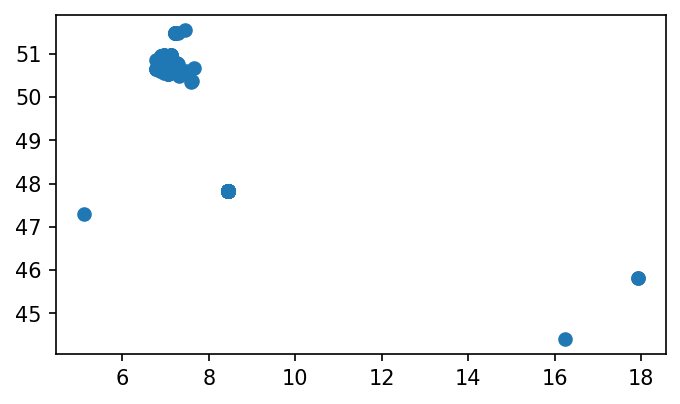

In [47]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,3), dpi=150)
gdf_bonn.plot(ax=ax)
plt.show()

In [49]:
#Filtering out longitudes und latitudes which do not belong to Bonn
#Referring more or less to the city_bounding_box of Bonn as in Bonn.geojson
bonn_trips = gdf_bonn[(gdf_bonn.longitude_start>6.0) & (gdf_bonn.longitude_start<8.0) & (gdf_bonn.latitude_start>50.0) & (gdf_bonn.latitude_start<51.0)]

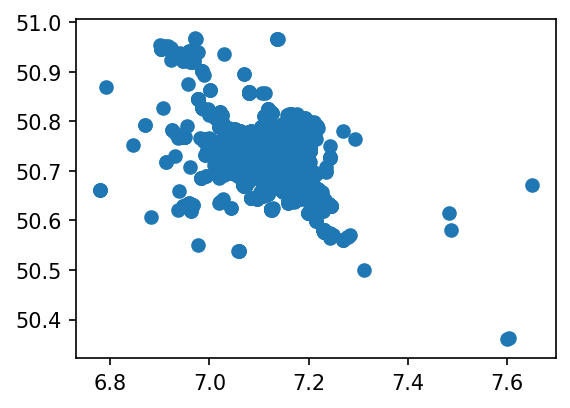

In [50]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,3), dpi=150)
bonn_trips.plot(ax=ax)
plt.show()

In [51]:
bonn_trips.to_csv("Data/bonn_trips.csv")